In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\elham\OneDrive\Desktop\IT project\Data analyst and scientist projects\Diabete\Diabetes-Classification.csv')

In [3]:
df.head(2)


,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [187]:

Cat_col=['Gender','Blood Pressure','Family History of Diabetes','Smoking','Diet','Exercise']
df2=pd.get_dummies(df,columns=Cat_col)
df2.head(2)

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,No,False,True,False,False,True,True,False,True,False,True,False,False,True
1,55,30.0,120,6.4,Yes,True,False,True,False,False,False,True,False,True,False,True,True,False


In [188]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             128 non-null    int64  
 1   BMI                             125 non-null    float64
 2   FBS                             128 non-null    int64  
 3   HbA1c                           128 non-null    float64
 4   Diagnosis                       128 non-null    object 
 5   Gender_Female                   128 non-null    bool   
 6   Gender_Male                     128 non-null    bool   
 7   Blood Pressure_High             128 non-null    bool   
 8   Blood Pressure_Low              128 non-null    bool   
 9   Blood Pressure_Normal           128 non-null    bool   
 10  Family History of Diabetes_No   128 non-null    bool   
 11  Family History of Diabetes_Yes  128 non-null    bool   
 12  Smoking_No                      128 

In [189]:
#secodn way
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df2['Diagnosis']=encoder.fit_transform(df2['Diagnosis'])


In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             128 non-null    int64  
 1   BMI                             125 non-null    float64
 2   FBS                             128 non-null    int64  
 3   HbA1c                           128 non-null    float64
 4   Diagnosis                       128 non-null    int32  
 5   Gender_Female                   128 non-null    bool   
 6   Gender_Male                     128 non-null    bool   
 7   Blood Pressure_High             128 non-null    bool   
 8   Blood Pressure_Low              128 non-null    bool   
 9   Blood Pressure_Normal           128 non-null    bool   
 10  Family History of Diabetes_No   128 non-null    bool   
 11  Family History of Diabetes_Yes  128 non-null    bool   
 12  Smoking_No                      128 

In [191]:
df2.head(2)

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,0,False,True,False,False,True,True,False,True,False,True,False,False,True
1,55,30.0,120,6.4,1,True,False,True,False,False,False,True,False,True,False,True,True,False


In [192]:
df2.isnull().sum()

Age                               0
BMI                               3
FBS                               0
HbA1c                             0
Diagnosis                         0
Gender_Female                     0
Gender_Male                       0
Blood Pressure_High               0
Blood Pressure_Low                0
Blood Pressure_Normal             0
Family History of Diabetes_No     0
Family History of Diabetes_Yes    0
Smoking_No                        0
Smoking_Yes                       0
Diet_Healthy                      0
Diet_Poor                         0
Exercise_No                       0
Exercise_Regular                  0
dtype: int64

In [193]:
df2=df2.dropna()
df2.isnull().sum()

Age                               0
BMI                               0
FBS                               0
HbA1c                             0
Diagnosis                         0
Gender_Female                     0
Gender_Male                       0
Blood Pressure_High               0
Blood Pressure_Low                0
Blood Pressure_Normal             0
Family History of Diabetes_No     0
Family History of Diabetes_Yes    0
Smoking_No                        0
Smoking_Yes                       0
Diet_Healthy                      0
Diet_Poor                         0
Exercise_No                       0
Exercise_Regular                  0
dtype: int64

In [194]:
X=df2.drop('Diagnosis',axis=1)
Y=df2['Diagnosis']
X.head(2)

,Age,BMI,FBS,HbA1c,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,False,True,False,False,True,True,False,True,False,True,False,False,True
1,55,30.0,120,6.4,True,False,True,False,False,False,True,False,True,False,True,True,False


In [195]:
X.shape

(125, 17)

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [197]:
from sklearn.neighbors import  KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [198]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
#classification report
y_pred=model.predict(X_test)

#classification report
print("nKNN Performance:")
classification_report(Y_test,y_pred)

print("f1 score:",f1_score(y_pred,Y_test))


nKNN Performance:
f1 score: 0.0


<Axes: >

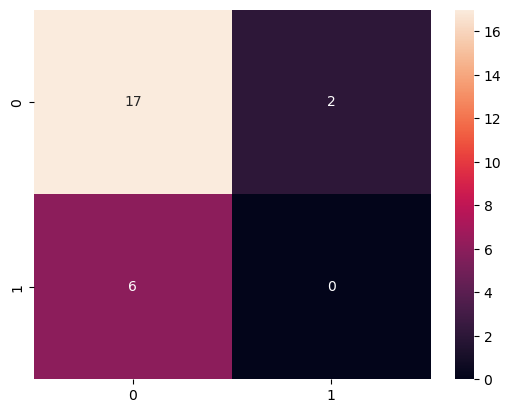

In [100]:
cm=confusion_matrix(Y_test,y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)


# Descriptive analysis
#Exploratory data analysis



##### Mean, median, mode → measures of central tendency

Minimum, maximum, range → spread of the data

Standard deviation, variance → variability

Count / missing values → completeness of the data

In [104]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [105]:
#Numerical value
df.describe() 

,Age,BMI,FBS,HbA1c
count,128.000000,125.000000,128.000000,128.000000
mean,43.335938,36.136000,162.500000,7.887500
std,20.889766,16.270071,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,29.500000,24.000000,120.000000,6.400000
50%,41.000000,34.000000,160.000000,7.800000
75%,55.000000,47.000000,205.000000,9.375000
max,185.000000,105.000000,280.000000,12.000000


In [110]:
#Frequency counts
print(df['Gender'].value_counts())
print(df['Diagnosis'].value_counts())
print(df['Smoking'].value_counts())
print(df['Blood Pressure'].value_counts())


Gender
Male      68
Female    60
Name: count, dtype: int64
Diagnosis
No     97
Yes    31
Name: count, dtype: int64
Smoking
Yes    78
No     48
Name: count, dtype: int64
Blood Pressure
High      79
Normal    39
Low       10
Name: count, dtype: int64


# Data distribution

# Relationships / correlations

In [119]:
col_numeric=['Age','HbA1c','BMI','FBS']
df[col_numeric].dtypes

Age        int64
HbA1c    float64
BMI      float64
FBS        int64
dtype: object

<Axes: >

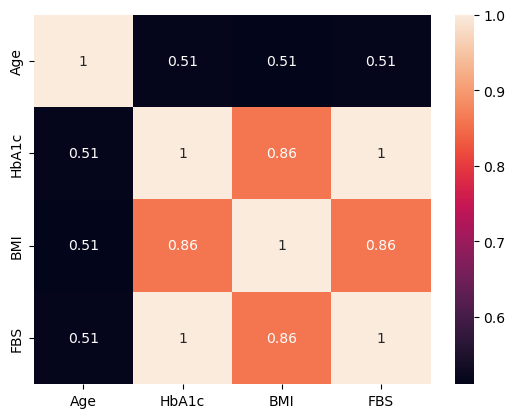

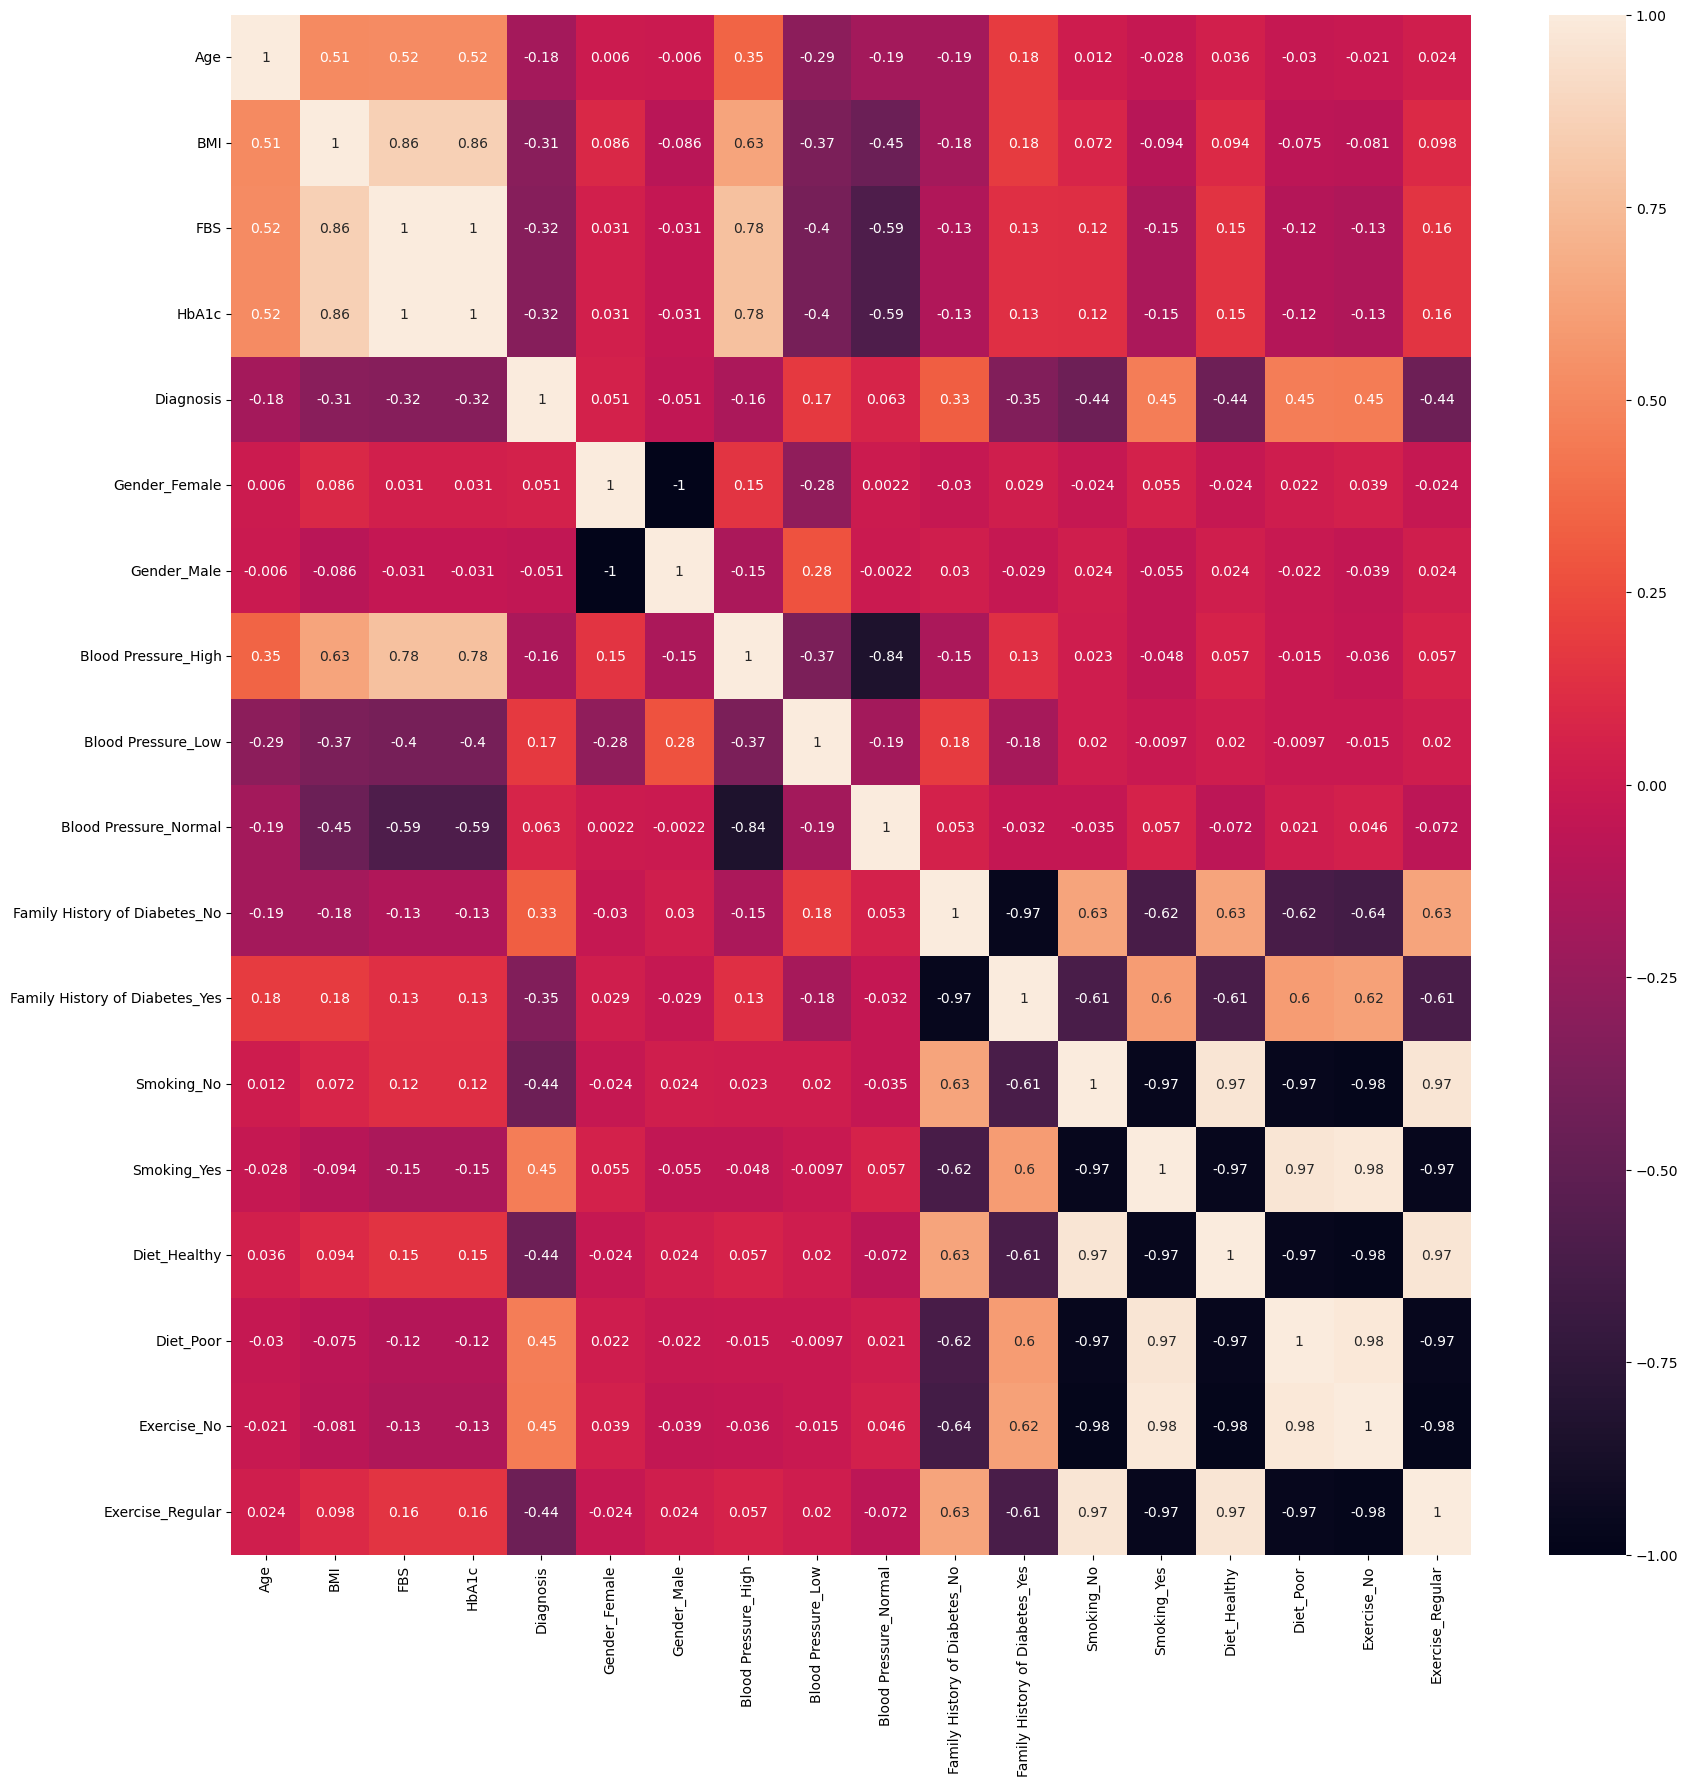

In [121]:
#correlation after encoding
encoded_corr=df2.corr()

col_numeric=['Age','HbA1c','BMI','FBS']
before_encoding=df[col_numeric].corr()


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(before_encoding,annot=True)

plt.figure(figsize=(20, 20))
sns.heatmap(encoded_corr,annot=True)

C:\Users\elham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


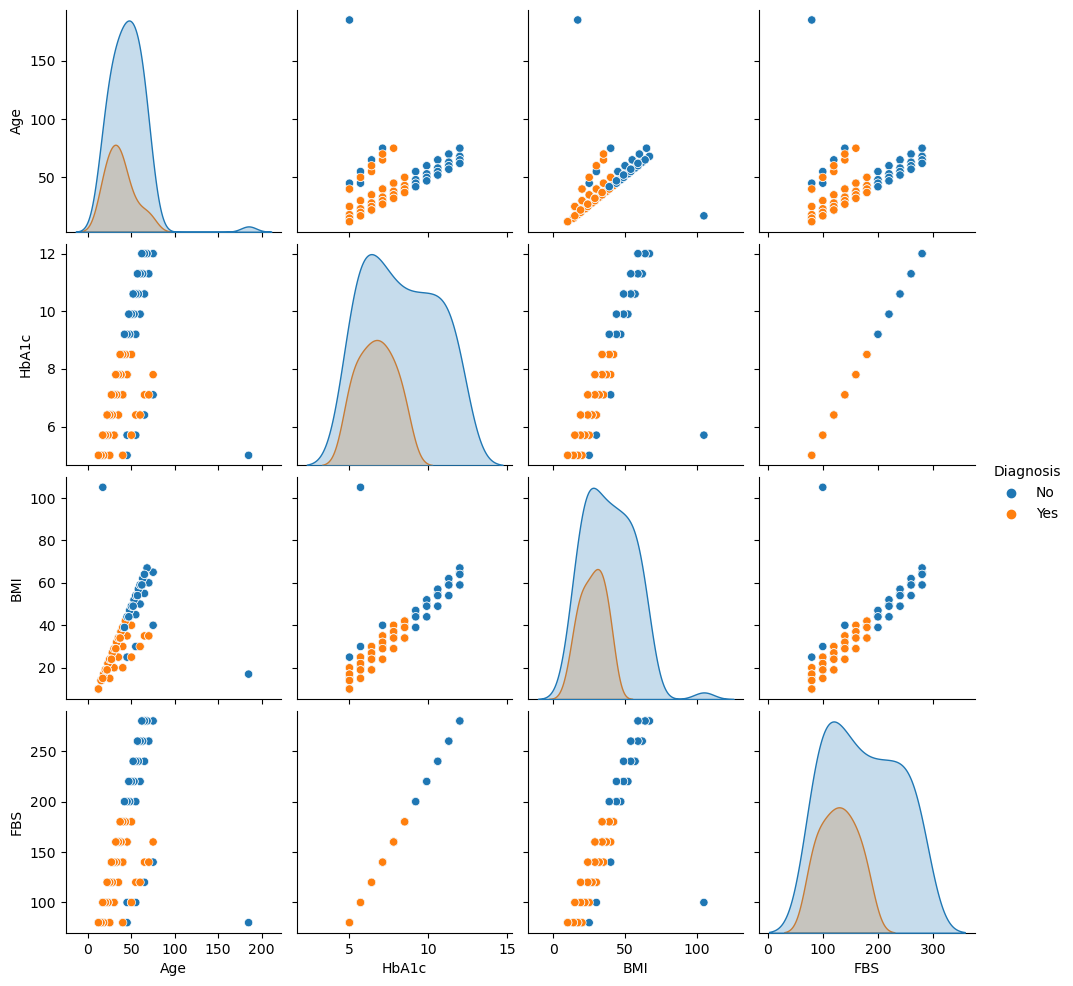

In [159]:

sns.pairplot(df[col_numeric+['Diagnosis']],hue='Diagnosis')
plt.show()

# Missing value analysis

In [123]:
#chceking null value
df.isnull().sum()

Age                           0
Gender                        0
BMI                           3
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    2
Smoking                       2
Diet                          2
Exercise                      1
Diagnosis                     0
dtype: int64

# Data distribution

<Axes: xlabel='FBS', ylabel='Count'>

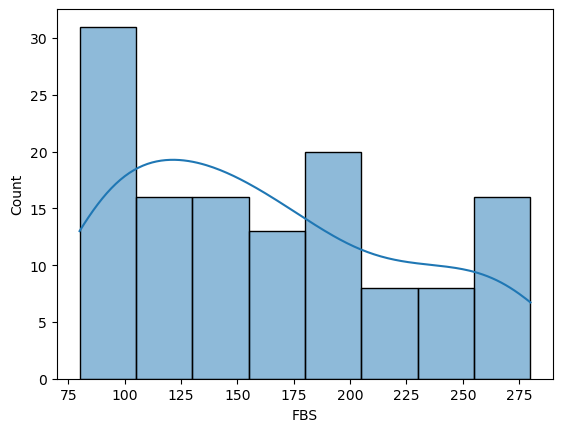

In [128]:
#checking normality and distribution
import seaborn as sns
sns.histplot(df['FBS'],kde=True)

<Axes: xlabel='BMI', ylabel='Density'>

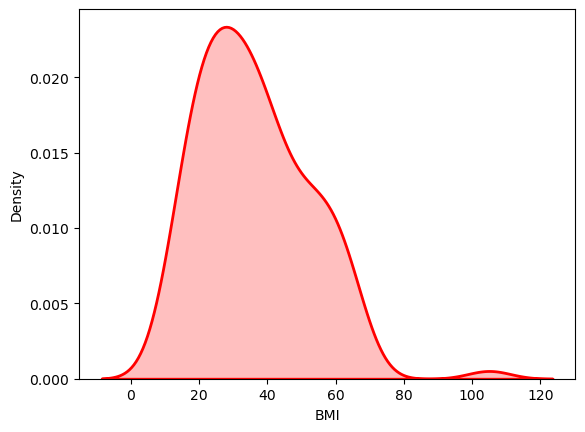

In [132]:
import seaborn as sns
sns.kdeplot(df['BMI'],fill=True,color='red',linewidth=2)

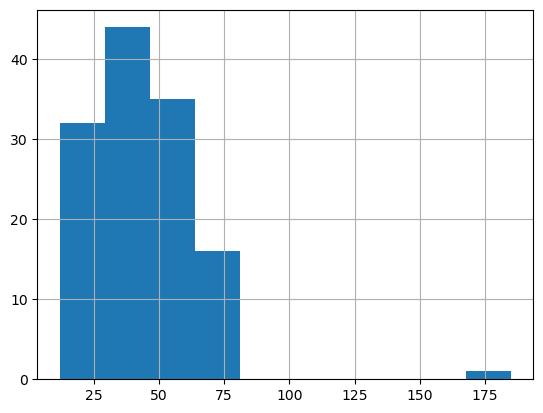

In [127]:
import matplotlib.pyplot as plt

df['Age'].hist()


plt.show()

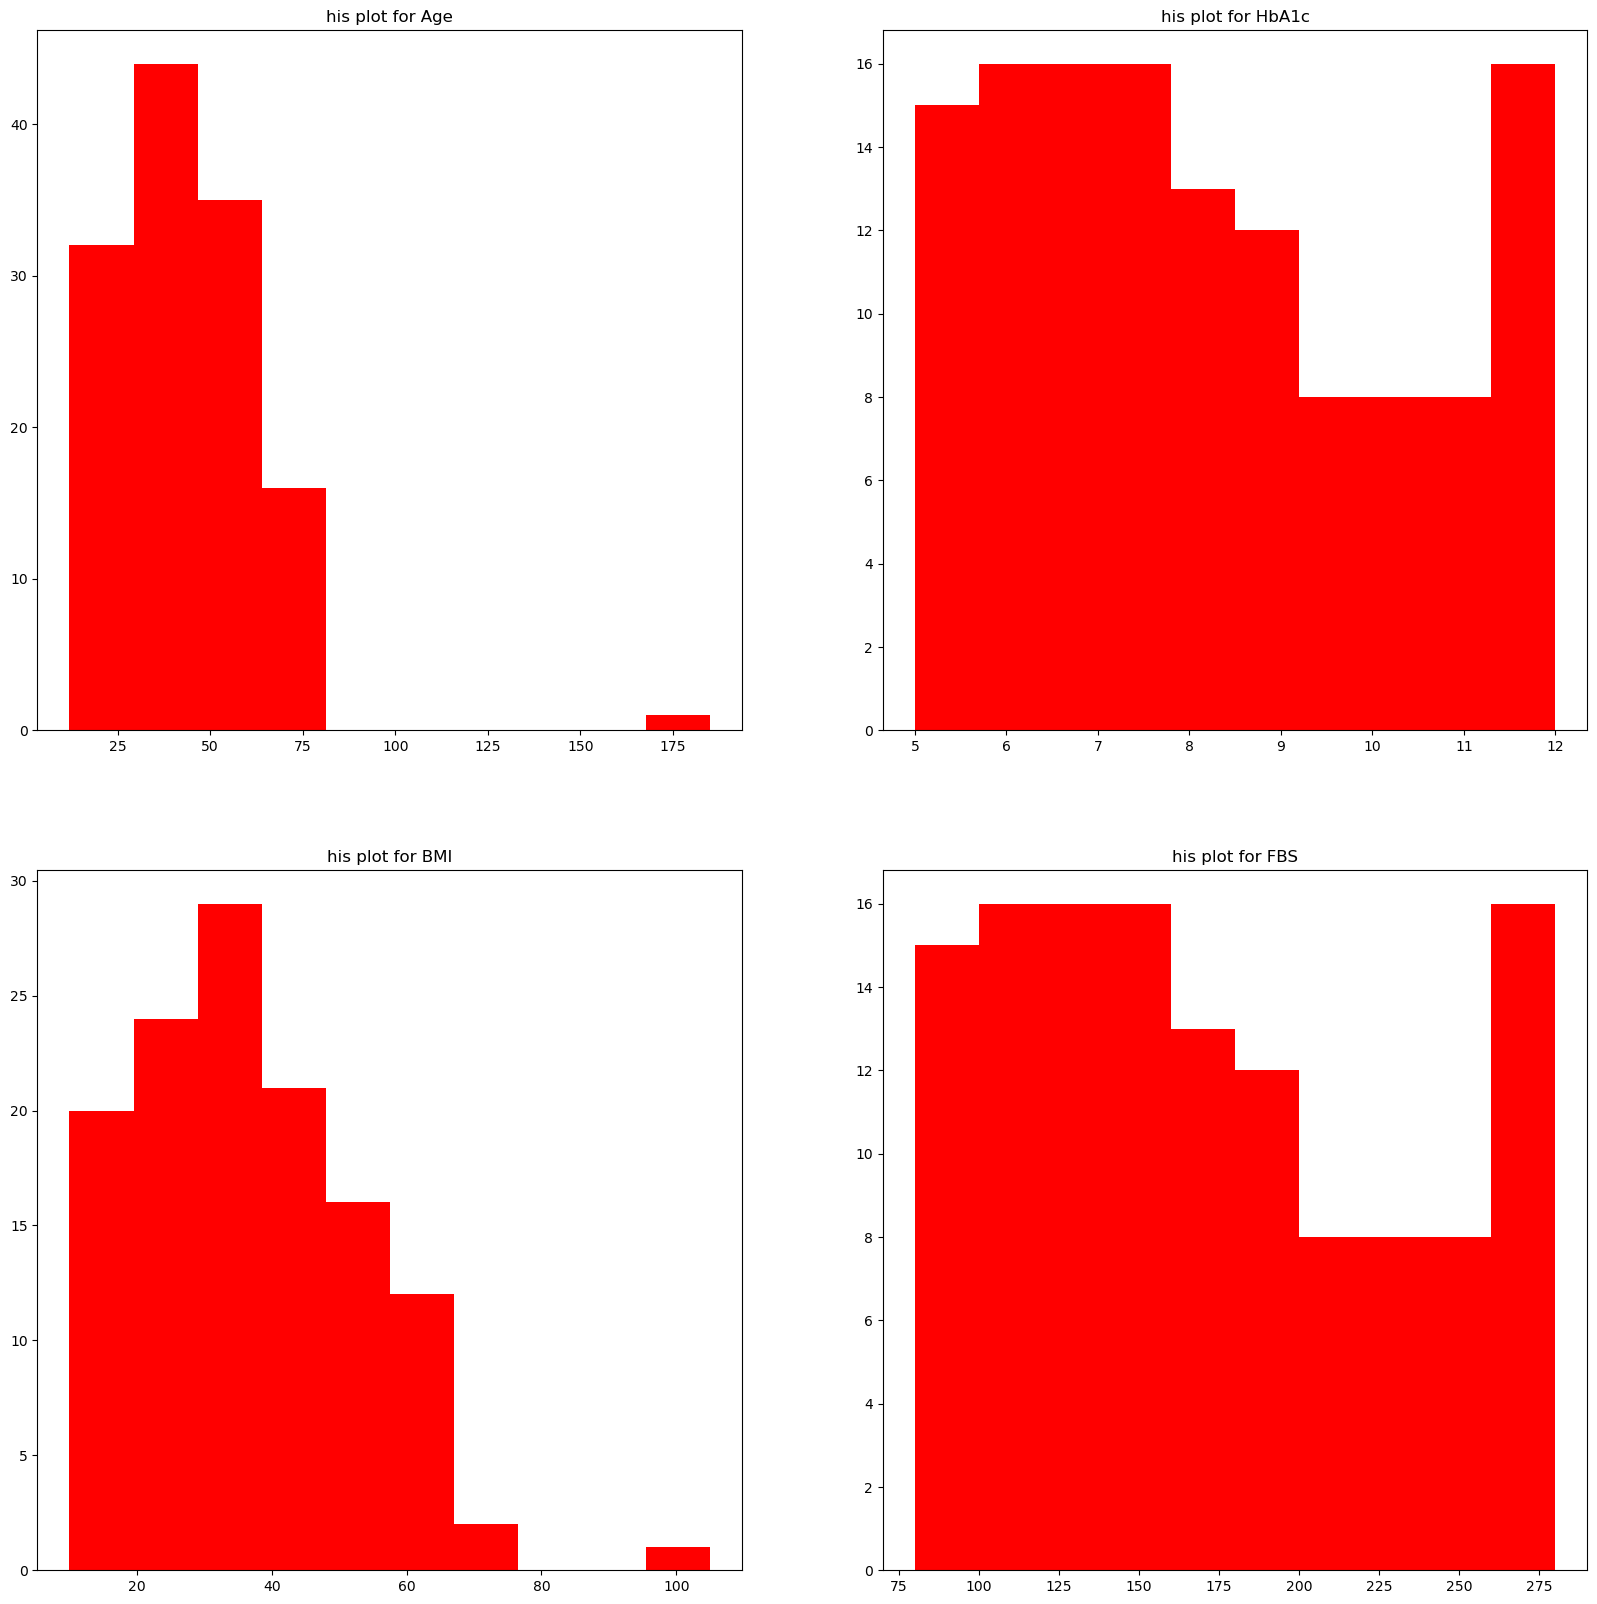

In [170]:
plt.figure(figsize=(20,20))
col_numeric=['Age','HbA1c','BMI','FBS']

for index, col in enumerate(col_numeric,1):
    plt.subplot(2,2,index)
    plt.hist(df[col],color='red')
    plt.title(f"his plot for {col}")
    
plt.show()


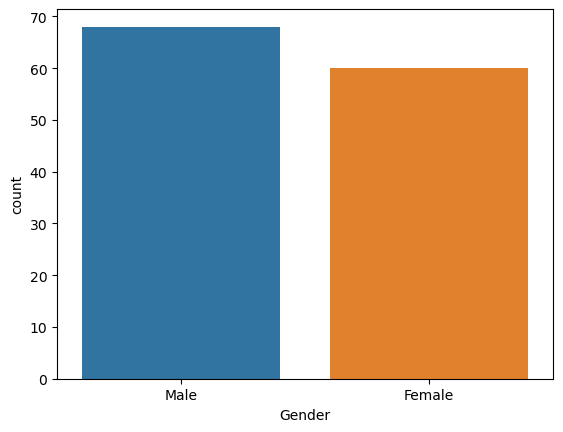

In [160]:
#categorical features 
sns.countplot(data=df, x='Gender')
plt.show()


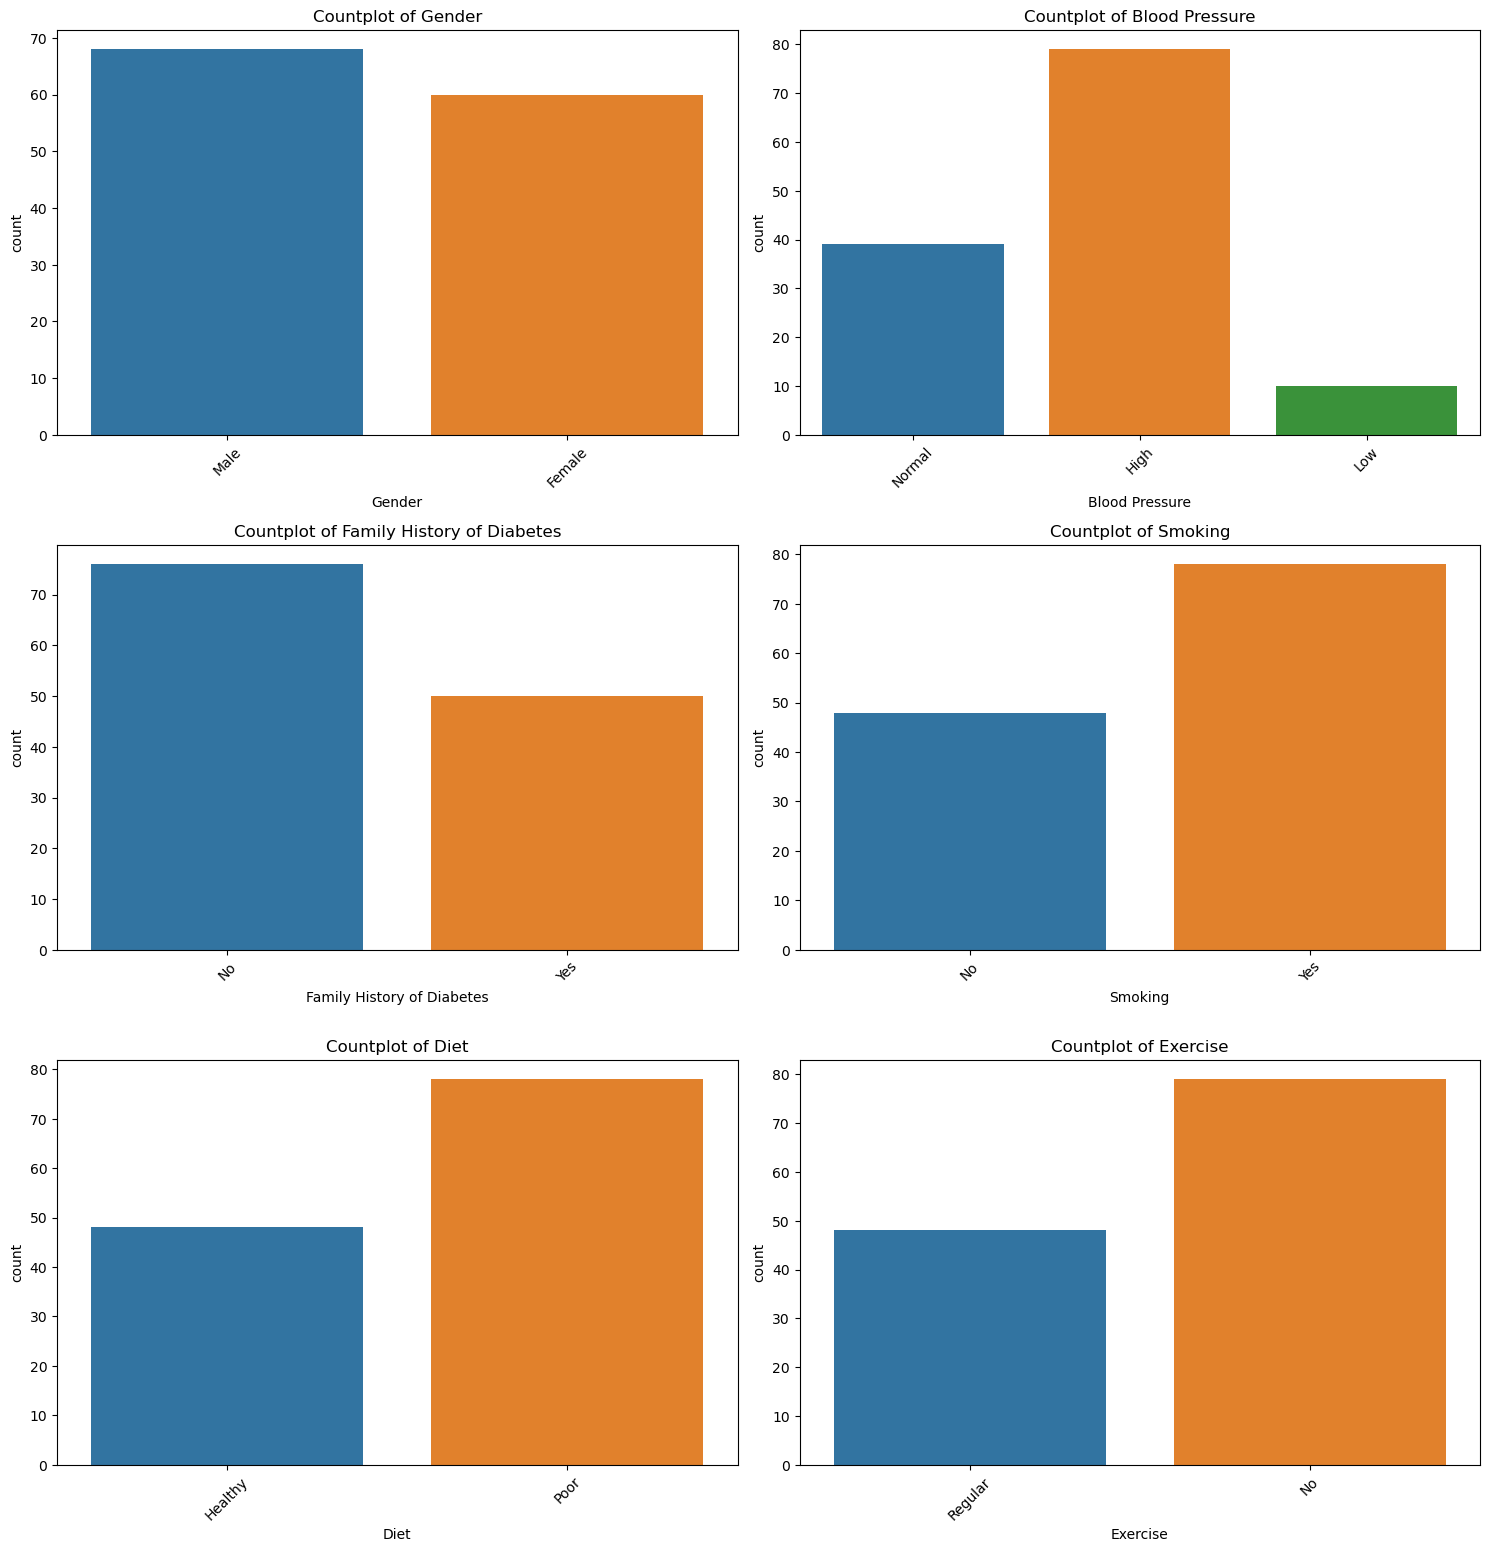

In [165]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of plots
plt.figure(figsize=(15, 20))

for i, col in enumerate(Cat_col, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Outlier detection

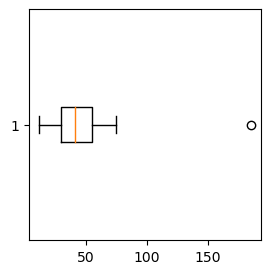

In [138]:
#outlier detection
plt.figure(figsize=(3,3))
plt.boxplot(df['Age'],vert=False)
plt.show()

In [157]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = (df['Age'] < lower_bound) | (df['Age'] > upper_bound)
df[(df['Age']<lower_bound)|(df['Age']>upper_bound)]



,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
55,185,Male,17.0,Normal,80,5.0,Yes,Yes,Poor,No,No


In [158]:
print(df[outliers])

    Age Gender   BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
55  185   Male  17.0         Normal   80    5.0                        Yes   

   Smoking  Diet Exercise Diagnosis  
55     Yes  Poor       No        No  


# Applying feature selection

In [171]:
df2.head(2)

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,0,False,True,False,False,True,True,False,True,False,True,False,False,True
1,55,30.0,120,6.4,1,True,False,True,False,False,False,True,False,True,False,True,True,False


In [175]:
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(score_func=f_classif,k=5)
X_selected = selector.fit_transform(X, Y)

selected_features = X.columns[selector.get_support()]
print(selected_features)



Index(['Smoking_Yes', 'Diet_Healthy', 'Diet_Poor', 'Exercise_No',
       'Exercise_Regular'],
      dtype='object')


In [176]:
print("X columns before selecting features",X.columns)
#created df with selected features


X columns before selecting features Index(['Age', 'BMI', 'FBS', 'HbA1c', 'Gender_Female', 'Gender_Male',
       'Blood Pressure_High', 'Blood Pressure_Low', 'Blood Pressure_Normal',
       'Family History of Diabetes_No', 'Family History of Diabetes_Yes',
       'Smoking_No', 'Smoking_Yes', 'Diet_Healthy', 'Diet_Poor', 'Exercise_No',
       'Exercise_Regular'],
      dtype='object')


In [178]:
X1=df2[selected_features]
print("X1 columns after selecting features",X1.columns)

X1 columns after selecting features Index(['Smoking_Yes', 'Diet_Healthy', 'Diet_Poor', 'Exercise_No',
       'Exercise_Regular'],
      dtype='object')


In [200]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y,test_size=0.2,random_state=42)

#KneighborsClassifier model
model.fit(X1_train,Y1_train)
y_pred_2=model.predict(X1_test)

from sklearn.metrics import f1_score
print("f1 score after feature selection:",f1_score(y_pred_2,Y1_test))
print("classification report after feature selection:",classification_report(y_pred_2,Y1_test))
print("f1 score before feature selection:",f1_score(y_pred,Y_test))


f1 score after feature selection: 0.6
classification report after feature selection:               precision    recall  f1-score   support

           0       0.58      1.00      0.73        11
           1       1.00      0.43      0.60        14

    accuracy                           0.68        25
   macro avg       0.79      0.71      0.67        25
weighted avg       0.81      0.68      0.66        25

f1 score before feature selection: 0.0


<Axes: >

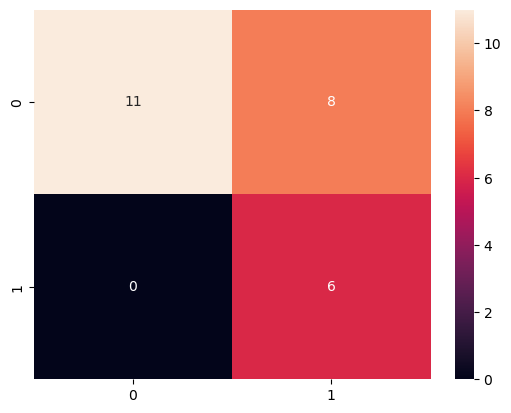

In [222]:
from sklearn.metrics import confusion_matrix
cm_1=confusion_matrix(Y1_test,y_pred_2)
sns.heatmap(cm_1,annot=True)

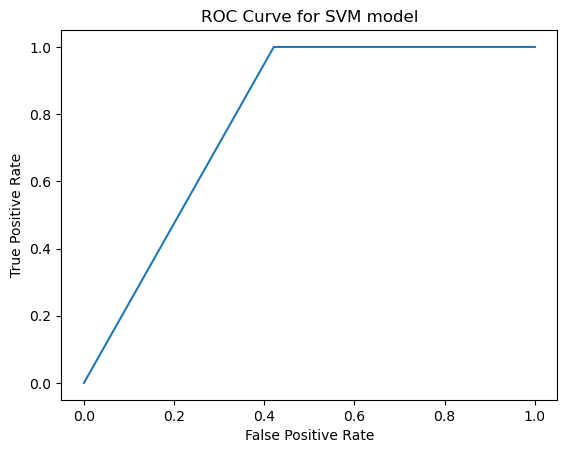

In [226]:
from sklearn.metrics import roc_auc_score, roc_curve
#choose class with probality 1
y_prob_kn=model.predict_proba(X1_test)[:,1]
fpr,tpr,threshold=roc_curve(Y1_test,y_prob_kn)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM model')
plt.show()




In [202]:
X1.dtypes

Smoking_Yes         bool
Diet_Healthy        bool
Diet_Poor           bool
Exercise_No         bool
Exercise_Regular    bool
dtype: object

<Axes: >

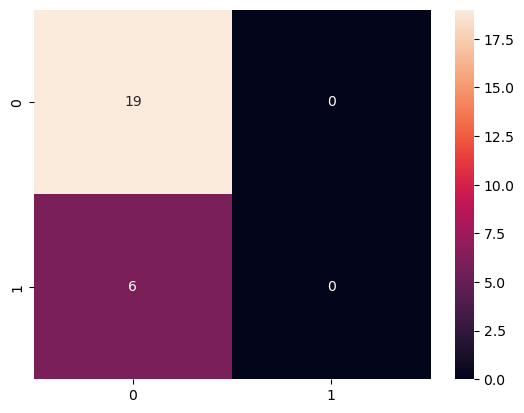

In [206]:
from sklearn.svm import SVC
model2=SVC(kernel='rbf',probability=True,random_state=10)
model2.fit(X1_train,Y1_train)
y_pred_svm=model2.predict(X1_test)
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y1_test,y_pred_svm)
sns.heatmap(cm,annot=True)

In [207]:
print("Classification_report",classification_report(Y1_test,y_pred_svm))


Classification_report               precision    recall  f1-score   support

           0       0.76      1.00      0.86        19
           1       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



C:\Users\elham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\elham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


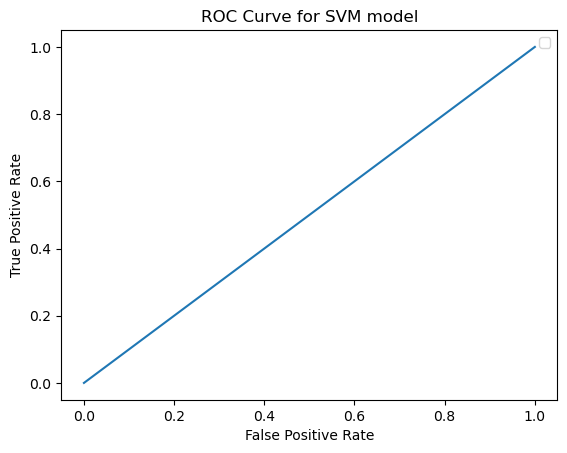

In [218]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_proba=model2.predict_proba(X1_test)[:,1]
fpr, tpr, thresholds=roc_curve(Y1_test,y_proba)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM model')
plt.legend()
plt.show()



In [228]:
from sklearn.metrics import roc_auc_score

knn_auc = roc_auc_score(Y1_test, model.predict_proba(X1_test)[:,1])
svm_auc = roc_auc_score(Y1_test, model2.predict_proba(X1_test)[:,1])

print("KNN AUC:", knn_auc)
print("SVM AUC:", svm_auc)
#KNN separates "Yes" vs "No" (or 1 vs 0) much more effectively

KNN AUC: 0.7894736842105263
SVM AUC: 0.5


In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# KNN predictions
knn_pred=model.predict(X1_test)

# SVM predictions
svm_pred = model2.predict(X1_test)

# Calculate metrics
metrics = {
    "Accuracy": [
        accuracy_score(Y1_test, knn_pred),
        accuracy_score(Y1_test, svm_pred)
    ],
    "Precision": [
        precision_score(Y1_test, knn_pred),
        precision_score(Y1_test, svm_pred)
    ],
    "Recall": [
        recall_score(Y1_test, knn_pred),
        recall_score(Y1_test, svm_pred)
    ],
    "F1 Score": [
        f1_score(Y1_test, knn_pred),
        f1_score(Y1_test, svm_pred)
    ]
}


C:\Users\elham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [237]:
print(metrics.keys())
print(list(metrics.keys()))
print(metrics.values())
knn_scores = [m[0] for m in metrics.values()]
svm_scores = [m[1] for m in metrics.values()]
labels=list(metrics.keys())

dict_keys(['Accuracy', 'Precision', 'Recall', 'F1 Score'])
['Accuracy', 'Precision', 'Recall', 'F1 Score']
dict_values([[0.68, 0.76], [0.42857142857142855, 0.0], [1.0, 0.0], [0.6, 0.0]])


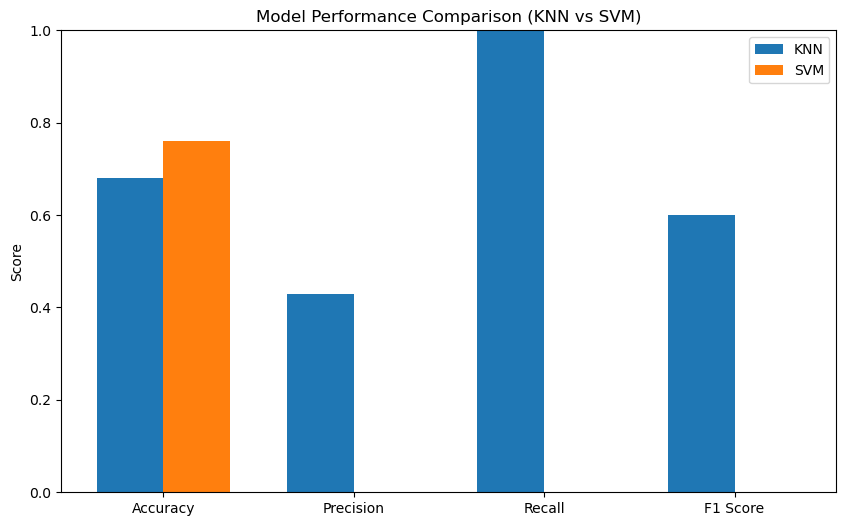

In [241]:
import numpy as np
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(x - width/2, knn_scores, width, label='KNN')
plt.bar(x + width/2, svm_scores, width, label='SVM')

plt.ylabel('Score')
plt.title('Model Performance Comparison (KNN vs SVM)')
plt.xticks(x, labels)
plt.ylim(0, 1)

plt.ylabel('Score')
plt.legend()
plt.show()


In [242]:
import joblib

joblib.dump(model,"KNN_model.pkl")



['KNN_model.pkl']

In [4]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load("KNN_model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()  # convert JSON to dict
    features = np.array([data["features"]])  # 2D array for sklearn
    proba = model.predict_proba(features)[0][1]  # probability for class 1
    return jsonify({
        "probability": float(proba),
        "prediction": "Approved" if proba > 0.5 else "Declined"
    })

if __name__ == "__main__":
    app.run(port=5000, debug=True)   #  <-- FIXED


 * Serving Flask app '__main__'
 * Debug mode: on


C:\Users\elham\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\elham\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [246]:
X1.head(1)




,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,False,True,False,False,True
